In [2]:
import matplotlib
import pandas as pd
import numpy as np
import psycopg2
import getpass
from cvxopt import matrix, solvers

In [19]:
price_df = pd.read_csv('price_df_clean.tsv', sep='\t', index_col=0, parse_dates=[0], date_parser=lambda x: pd.to_datetime(x))
return_ = (price_df[1:].values - price_df[:-1].values) / price_df[1:].values
return_df=pd.DataFrame(return_,columns=price_df.columns,index=price_df.index[1:])


In [20]:
price_df.head()

,SSE-601166,SSE-601117,SSE-600089,SSE-600048,SSE-600583,SSE-600316,SSE-601006,SSE-600150,SSE-600143,SSE-601179,...,SSE-601600,SSE-600029,SSE-600111,SSE-600028,SSE-600118,SSE-600166,SSE-600875,SSE-601628,SSE-601186,SSE-600348
2011-01-04 00:00:00+08:00,27.520949,5.78,439.149773,95.633444,144.180908,119.791203,8.787837,106.175098,164.548344,8.14,...,10.590142,15.195,303.804164,12.682924,267.676601,140.957167,99.159152,23.020282,7.110175,214.144479
2011-01-05 00:00:00+08:00,27.409483,5.68,440.744196,95.975971,147.900563,120.825372,8.699071,106.469083,165.357930,8.21,...,10.427060,14.730,304.140649,12.543721,269.469549,138.826832,101.708230,22.597309,7.223690,220.772059
2011-01-06 00:00:00+08:00,27.610122,5.58,436.188701,98.510668,146.837804,121.213185,8.710167,103.405447,165.357930,8.11,...,10.478023,14.370,311.795689,12.497320,272.211705,141.844807,98.564367,22.671330,7.151453,216.132753
2011-01-07 00:00:00+08:00,29.560777,5.62,438.921998,98.579174,143.118150,121.083914,8.765645,105.401452,161.714793,8.18,...,10.528986,14.580,300.271068,12.651990,259.766536,141.785631,95.533796,23.041431,7.182412,212.303485
2011-01-10 00:00:00+08:00,28.546436,5.54,433.227628,95.633444,141.524012,121.083914,8.810028,109.656502,154.023726,8.06,...,10.263978,14.010,301.364645,12.682924,251.012731,136.518969,95.250565,22.745350,7.161772,207.222340


In [21]:
return_1 = (price_df[1:].values - price_df[:-1].values) / price_df[:-1].values
return_df1=pd.DataFrame(return_1,columns=price_df.columns,index=price_df.index[1:])

In [22]:
tradeoff_interval=30
start=50
r=0.005#cash return

在第50天做一个 portfolio,用前面30个连续15天滑动return

In [23]:
data=return_df15[start-tradeoff_interval:start]

In [24]:
data.shape

(30, 80)

In [26]:
r=0.001

In [27]:
def select_stock(data_df,threshold):
    return_mean=data_df.mean()
    order=np.where(return_mean>threshold)
    stocks=data_df.columns[order]
    return stocks
stocks = select_stock(data,r)    

In [28]:
print(stocks)
stocks.shape

Index(['SSE-601166', 'SSE-601117', 'SSE-600089', 'SSE-600048', 'SSE-600316',
       'SSE-601006', 'SSE-600150', 'SSE-600143', 'SSE-600795', 'SSE-600016',
       'SSE-601857', 'SSE-601088', 'SSE-601898', 'SSE-601288', 'SSE-601988',
       'SSE-601998', 'SSE-600642', 'SSE-600585', 'SSE-600809', 'SSE-601328',
       'SSE-600895', 'SSE-600015', 'SSE-601939', 'SSE-601377', 'SSE-600837',
       'SSE-600019', 'SSE-601099', 'SSE-600309', 'SSE-600415', 'SSE-601398',
       'SSE-600008', 'SSE-600383', 'SSE-601958', 'SSE-600489', 'SSE-600009',
       'SSE-601601', 'SSE-601168', 'SSE-600031', 'SSE-600036', 'SSE-601699',
       'SSE-600085', 'SSE-601098', 'SSE-600660', 'SSE-600188', 'SSE-601318',
       'SSE-601668', 'SSE-601009', 'SSE-600030', 'SSE-600011', 'SSE-601600',
       'SSE-600111', 'SSE-600166', 'SSE-600348'],
      dtype='object')


(53,)

In [29]:
def add_bank_return(data,stocks,tradeoff_interval,r):
    stock_values=data[stocks].values
    r_ls = np.full((tradeoff_interval,1),r)[:,0]
    fixed_values=np.c_[stock_values,r_ls]
    return fixed_values
fixed_return=add_bank_return(data,stocks,tradeoff_interval,r)

In [ ]:
fixed_return

In [30]:
def return_cov(return_data):
    return_mean=np.mean(return_data,axis=0)
    number_stock=return_mean.shape[0]
    cen_rs=return_data-return_mean
    r_cov = cen_rs.T.dot(cen_rs)/(number_stock-1)
    return r_cov
cov_values=return_cov(fixed_return)

In [32]:
solvers.options['show_progress'] = False

In [35]:
def QP(return_data,lam):
    return_mean=np.mean(return_data,axis=0)
    number_stock=return_mean.shape[0]
    cen_rs=return_data-return_mean
    r_cov = cen_rs.T.dot(cen_rs)/(number_stock-1)
    Q=lam*matrix(r_cov)
    p=matrix(return_mean)
    G=matrix(-np.eye(number_stock))
    h=matrix(np.zeros(number_stock))
    A=matrix(np.ones(number_stock),(1,number_stock))
    b=matrix(1.0)
    sol=solvers.qp(Q,p,G, h, A, b)
    fraction=np.array(sol['x'])[:,0]
    return sol,fraction

sol, fraction=QP(fixed_return,1)


In [36]:
fraction

array([3.61221289e-10, 8.26425969e-10, 7.98765572e-10, 5.34761293e-10,
       5.24881294e-10, 2.23566644e-09, 9.53933983e-10, 1.39679073e-09,
       1.02626036e-09, 4.12557643e-10, 1.17299112e-09, 2.37435135e-10,
       7.77449943e-10, 7.57172637e-10, 1.33683473e-09, 6.47210366e-10,
       1.78082631e-09, 1.87444268e-10, 2.11209119e-09, 1.03347612e-09,
       3.71423350e-10, 3.42045832e-10, 1.20705883e-09, 3.28933750e-10,
       1.40770486e-09, 2.02438735e-09, 5.73769808e-08, 2.66570062e-10,
       8.14731015e-09, 8.18582311e-10, 1.42060439e-09, 1.34057473e-09,
       4.68008127e-10, 1.35798926e-09, 2.78041723e-09, 2.84097805e-09,
       9.17917669e-10, 2.07475427e-10, 3.55659036e-10, 2.89966906e-10,
       2.75824173e-10, 7.54847682e-07, 8.28511763e-10, 1.52978322e-10,
       2.16997437e-09, 1.54592180e-09, 4.90030309e-10, 6.43098427e-10,
       1.50310170e-09, 7.49477049e-10, 1.64998201e-10, 7.72870055e-10,
       9.42254711e-10, 9.99999132e-01])

In [65]:
sol

{'x': <49x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <49x1 matrix, tc='d'>,
 'z': <49x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 2.4060155042109235e-08,
 'relative gap': 4.812033572849705e-06,
 'primal objective': 0.005000021395556158,
 'dual objective': 0.004999997335401115,
 'primal infeasibility': 3.3306690743254916e-16,
 'dual infeasibility': 1.1470286772172119e-16,
 'primal slack': 3.4928732556512508e-09,
 'dual slack': 2.6645984525364244e-09,
 'iterations': 7}

In [68]:
# cash return?
np.array(sol['y'])

array([[-0.005]])

In [73]:
# bias in inequality?
print("sum(x):", sum(np.array(sol['x'])))
print(f"sum(z): {sum(np.array(sol['z']))}")
pd.DataFrame(np.array(sol['z']))

sum(x): [1.]
sum(z): [1.69757898]


,0
0,5.465398e-02
1,2.170040e-02
2,2.204764e-02
3,3.524052e-02
4,3.670033e-02
5,2.827153e-03
6,1.766274e-02
7,1.034339e-02
8,1.579553e-02
9,4.724502e-02


## Try different lambda

In [15]:
#lambda=6
sol, fraction = QP(fixed_return,6)

In [17]:
fraction

array([1.01259812e-08, 2.46218195e-08, 2.49491333e-08, 1.56618466e-08,
       1.48556334e-08, 1.85858480e-07, 3.16750886e-08, 4.78317837e-08,
       3.43656034e-08, 1.16574878e-08, 4.02626870e-08, 6.48721521e-09,
       2.37440008e-08, 2.33303459e-08, 4.80971629e-08, 1.91696032e-08,
       7.38541197e-08, 5.05742056e-09, 1.77542794e-06, 3.42267146e-08,
       1.01958506e-08, 9.49234356e-09, 4.22591752e-08, 8.97705595e-09,
       4.93025386e-08, 1.27183313e-07, 7.30007981e-09, 2.57146280e-08,
       5.34962498e-08, 1.29361262e-08, 4.44723057e-08, 3.50948238e-07,
       2.90386728e-08, 5.63671725e-09, 9.91314549e-09, 7.96415088e-09,
       7.66980448e-09, 2.54842713e-08, 4.11028285e-09, 1.59320805e-07,
       7.00661166e-08, 1.40311538e-08, 1.84946844e-08, 5.80360741e-08,
       2.32138788e-08, 4.42860526e-09, 2.36658827e-08, 2.97081005e-08,
       9.99996316e-01])

In [22]:
# lambda=0.5
sol, fraction=QP(fixed_return,0.5)
fraction

array([1.03360039e-08, 2.58966061e-08, 2.55116916e-08, 1.60089538e-08,
       1.53841401e-08, 1.71652557e-07, 3.18031588e-08, 5.51013299e-08,
       3.55401768e-08, 1.19557813e-08, 4.30098275e-08, 6.58769391e-09,
       2.45497825e-08, 2.40801005e-08, 5.26673440e-08, 1.98619253e-08,
       8.57579013e-08, 5.14965750e-09, 1.53163015e-07, 3.58988730e-08,
       1.05500003e-08, 9.72966333e-09, 4.50106127e-08, 9.27621234e-09,
       5.45561554e-08, 1.24023993e-07, 7.42508398e-09, 2.65030904e-08,
       5.51843968e-08, 1.35792487e-08, 5.16832946e-08, 1.81182962e-07,
       3.04625120e-08, 5.72151631e-09, 1.01435053e-08, 8.14170918e-09,
       7.71497562e-09, 2.64427566e-08, 4.18557289e-09, 1.36886605e-07,
       7.18005866e-08, 1.44383207e-08, 1.94324446e-08, 6.34787686e-08,
       2.37778769e-08, 4.51571366e-09, 2.43694375e-08, 3.11713497e-08,
       9.99998079e-01])

In [23]:
# lambda=0.1
sol, fraction=QP(fixed_return,0.1)
fraction

array([1.09884410e-08, 2.76104690e-08, 2.71817953e-08, 1.70472037e-08,
       1.63730345e-08, 1.99152876e-07, 3.39307303e-08, 5.92266626e-08,
       3.79893013e-08, 1.27169838e-08, 4.60553730e-08, 6.99194098e-09,
       2.61799763e-08, 2.56808239e-08, 5.66194973e-08, 2.11623280e-08,
       9.39918913e-08, 5.46716387e-09, 1.52109004e-07, 3.83976545e-08,
       1.12074790e-08, 1.03429804e-08, 4.82391333e-08, 9.86237607e-09,
       5.88125688e-08, 1.37813983e-07, 7.87844036e-09, 2.82699951e-08,
       5.93353974e-08, 1.44538908e-08, 5.55990052e-08, 2.07651448e-07,
       3.25526624e-08, 6.07137838e-09, 1.07815723e-08, 8.64941099e-09,
       8.18201821e-09, 2.82029365e-08, 4.44560628e-09, 1.54051008e-07,
       7.79684610e-08, 1.53639912e-08, 2.07229198e-08, 6.86771521e-08,
       2.53541173e-08, 4.79379384e-09, 2.59871290e-08, 3.32963051e-08,
       9.99997911e-01])

In [24]:
def simulation(interval,begin,end,return_df,r):
    fraction_ls=[]
    for start in range(begin,end):
        operation_data=return_df[interval:start]
        stocks=select_stock(operation_data,r)
        if len(stocks)>0:
            fixed_return=add_bank_return(data,stocks,tradeoff_interval,r)
            fraction=QP(fixed_return,2)
            fraction_ls.append(fraction)
            
    return fraction_ls
fraction_result=simulation(30,31,1000,return_df15,0.005)

In [32]:
result_cash=[]
select_frac=[]
for fraction_ls in fraction_result:
    if fraction_ls[-1]>0.01:
        result_cash.append(fraction_ls[-1])
        select_frac.append(fraction_ls)

In [53]:
efficiency_set=[]
for item in select_frac:
    efficiency_ele=[]
    for element in item:
        if element >=0.01:
            efficiency_ele.append(element)
    efficiency_set.append(efficiency_ele)

In [54]:
len(select_frac)

79

In [61]:
len(select_frac)

79

In [63]:
select_frac[3:10]

[array([2.82991897e-07, 2.56520046e-07, 3.56543373e-06, 7.74186317e-01,
        1.53490454e-08, 3.60916995e-08, 2.25809526e-01]),
 array([2.82991897e-07, 2.56520046e-07, 3.56543373e-06, 7.74186317e-01,
        1.53490454e-08, 3.60916995e-08, 2.25809526e-01]),
 array([2.82991897e-07, 2.56520046e-07, 3.56543373e-06, 7.74186317e-01,
        1.53490454e-08, 3.60916995e-08, 2.25809526e-01]),
 array([2.82991897e-07, 2.56520046e-07, 3.56543373e-06, 7.74186317e-01,
        1.53490454e-08, 3.60916995e-08, 2.25809526e-01]),
 array([1.01618369e-07, 1.79593079e-06, 6.45163276e-01, 4.59651874e-09,
        1.63793159e-08, 3.54834805e-01]),
 array([1.01618369e-07, 1.79593079e-06, 6.45163276e-01, 4.59651874e-09,
        1.63793159e-08, 3.54834805e-01]),
 array([1.01618369e-07, 1.79593079e-06, 6.45163276e-01, 4.59651874e-09,
        1.63793159e-08, 3.54834805e-01])]

In [59]:
len(efficiency_set)

79

In [58]:
efficiency_set

[[0.3235941514961508, 0.6764040698381353],
 [0.03683776511375526, 0.8869619353231419, 0.07620020715425818],
 [0.03683776511375526, 0.8869619353231419, 0.07620020715425818],
 [0.7741863172969901, 0.22580952631659423],
 [0.7741863172969901, 0.22580952631659423],
 [0.7741863172969901, 0.22580952631659423],
 [0.7741863172969901, 0.22580952631659423],
 [0.6451632764450138, 0.354834805029991],
 [0.6451632764450138, 0.354834805029991],
 [0.6451632764450138, 0.354834805029991],
 [0.6451632764450138, 0.354834805029991],
 [0.6451632764450138, 0.354834805029991],
 [0.6451632764450138, 0.354834805029991],
 [0.6451632764450138, 0.354834805029991],
 [0.6451632764450138, 0.354834805029991],
 [0.5161309554700192, 0.4838678858953641],
 [0.5161309554700192, 0.4838678858953641],
 [0.5161309554700192, 0.4838678858953641],
 [0.5161309554700192, 0.4838678858953641],
 [0.5161309554700192, 0.4838678858953641],
 [0.9032227246733234, 0.09677719172398937],
 [0.9032227246733234, 0.09677719172398937],
 [0.90322350

In [35]:
len(efficency)

NameError: name 'efficency' is not defined

In [30]:
select_frac[:3]

[array([1.11469564e-08, 1.89308325e-08, 1.43678845e-08, 1.23364393e-07,
        1.44085581e-08, 2.81912479e-08, 1.94528429e-08, 2.04452331e-08,
        3.40185910e-07, 1.23067903e-08, 8.15522125e-09, 1.80710513e-08,
        5.18650014e-06, 1.76890724e-08, 1.64015072e-08, 6.73841469e-09,
        2.07429565e-08, 3.90244153e-06, 1.14604163e-08, 1.08082325e-08,
        3.88469567e-08, 1.05351671e-08, 2.39873928e-08, 5.58892065e-08,
        2.66276667e-08, 3.72420494e-08, 8.90828042e-09, 3.73356047e-08,
        1.83713835e-08, 2.21999955e-08, 1.36639491e-08, 3.04777421e-08,
        3.23975934e-08, 9.91941103e-08, 7.29013820e-09, 1.10922091e-08,
        9.02255517e-09, 3.77534684e-08, 1.85649643e-08, 5.69144185e-09,
        2.82421554e-08, 9.99989481e-01, 3.88564494e-08, 1.37913693e-08,
        1.65210003e-08, 6.07458018e-09, 1.76833900e-08, 1.99766824e-08,
        3.06044643e-08]),
 array([1.02840443e-08, 1.74039686e-08, 1.32465476e-08, 1.04496725e-07,
        1.32546335e-08, 1.78956224e-08

In [65]:
primal_ls=[]
for solutions in fraction_ls:
    primal_ls.append(solutions['primal objective'])

IndexError: invalid index to scalar variable.

In [52]:
fraction_result[176:]

[array([0.85711469, 0.14288531]),
 array([0.85711469, 0.14288531]),
 array([0.85711469, 0.14288531]),
 array([0.85711469, 0.14288531]),
 array([0.85711469, 0.14288531]),
 array([0.85711469, 0.14288531]),
 array([0.85711469, 0.14288531]),
 array([0.85711469, 0.14288531])]

In [58]:
fraction_result[70:80]

[array([2.20109458e-07, 1.34719940e-01, 8.65279822e-01, 1.78237643e-08]),
 array([2.20109458e-07, 1.34719940e-01, 8.65279822e-01, 1.78237643e-08]),
 array([1.93197936e-01, 8.06802027e-01, 3.71644552e-08]),
 array([1.93197936e-01, 8.06802027e-01, 3.71644552e-08]),
 array([2.20109458e-07, 1.34719940e-01, 8.65279822e-01, 1.78237643e-08]),
 array([9.99998149e-01, 3.27810730e-07, 1.47004776e-08, 1.43811795e-06,
        6.99030802e-08]),
 array([9.99998149e-01, 3.27810730e-07, 1.47004776e-08, 1.43811795e-06,
        6.99030802e-08]),
 array([9.99998149e-01, 3.27810730e-07, 1.47004776e-08, 1.43811795e-06,
        6.99030802e-08]),
 array([9.99998681e-01, 3.16450608e-07, 2.47455077e-07, 1.34775530e-08,
        6.67612869e-07, 7.39136964e-08]),
 array([1.37636836e-07, 9.99999045e-01, 1.83823687e-07, 1.66563884e-07,
        1.18192739e-08, 3.87595982e-07, 6.80527432e-08])]

In [20]:
result_cash=[]
select_frac=[]
for fraction_ls in fraction_result:
    if fraction_ls[-1]>=0.05:
        result_cash.append(fraction_ls[-1])
        sel_frac.append(fraction_ls)

In [21]:
sel_frac

[array([3.10968476e-06, 8.35032314e-01, 1.04832412e-07, 1.64964472e-01]),
 array([2.97559893e-08, 1.04752427e-07, 9.99999865e-01]),
 array([2.97559893e-08, 1.04752427e-07, 9.99999865e-01]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.06766266, 0.8003795 , 0.13195784]),
 array([0.27834603, 0.72165397]),
 array([0.27834603, 0.72165397]),
 array([0.27834603, 0.72165397]),
 array([0.27834603, 0.72165397]),
 array([0.27834603, 0.72165397]),
 array([0.27834603, 0.72165397]),
 array([0.27834603, 0.72165397]),
 array([0.27834603, 0.72165397]),
 array([0.27834603, 0.72165397]),
 array([0.07241733, 0.92758267]),
 array([0.

In [14]:
 len(result_cash)

67

In [24]:
fraction_result=simulation(30,31,1000,return_df15,0.03)

In [25]:
len(fraction_result)

184

In [26]:
fraction_result[0]['primal objective']

-0.019014448556619074

In [28]:
primal_ls=[]
for i in range(len(fraction_result)):
    primal_ls.append(fraction_result[i]['primal objective'])

In [29]:
from matplotlib import pyplot as plt

(array([ 3.,  0., 16., 17., 44., 28., 10.,  9.,  1., 56.]),
 array([-0.01908856, -0.01417971, -0.00927085, -0.00436199,  0.00054687,
         0.00545572,  0.01036458,  0.01527344,  0.0201823 ,  0.02509116,
         0.03000001]),
 <a list of 10 Patch objects>)

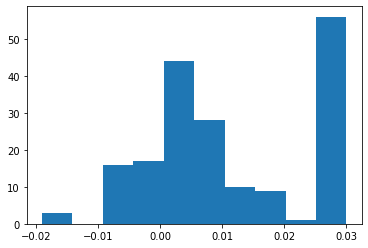

In [30]:
plt.hist(primal_ls)

In [15]:
result_cash

[0.16496447197900724,
 0.999999865491584,
 0.999999865491584,
 0.13195783996593688,
 0.13195783996593688,
 0.13195783996593688,
 0.13195783996593688,
 0.13195783996593688,
 0.13195783996593688,
 0.13195783996593688,
 0.13195783996593688,
 0.13195783996593688,
 0.13195783996593688,
 0.7216539665259344,
 0.7216539665259344,
 0.7216539665259344,
 0.7216539665259344,
 0.7216539665259344,
 0.7216539665259344,
 0.7216539665259344,
 0.7216539665259344,
 0.7216539665259344,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9275826682491788,
 0.9

In [29]:
fraction_result[0][-1]

1.1509512637033024e-09

In [32]:
fraction_result[0]

array([1.36100533e-09, 1.17734689e-09, 1.38235957e-09, 1.03512352e-09,
       2.18704552e-09, 6.87474793e-10, 1.16492189e-09, 1.20279347e-09,
       1.33168577e-09, 9.99999966e-01, 1.10302644e-09, 1.23383441e-09,
       1.28582682e-09, 8.34552597e-10, 1.20372965e-09, 1.17151452e-09,
       2.16866784e-10, 1.52466464e-09, 1.45570443e-09, 8.14170365e-10,
       1.36267131e-09, 9.40290532e-10, 1.22410030e-09, 1.17745401e-09,
       7.47633154e-10, 1.29730616e-09, 1.30179417e-09, 1.31661469e-09,
       1.01567887e-09, 1.15095126e-09])

In [22]:
return_df.shape[0]

1451

In [19]:
tradeoff_interval=30
start=170
r=0.03
data=return_df15[start-tradeoff_interval:start]
stocks = select_stock(data,r)
fixed_return=add_bank_return(data,stocks,tradeoff_interval,r)
cov_values=return_cov(fixed_return)
fraction=QP(fixed_return,2)  

     pcost       dcost       gap    pres   dres
 0:  6.0030e-02 -9.9400e-01  1e+00  0e+00  2e+00
 1:  5.4267e-02  1.0817e-03  5e-02  2e-16  1e-01
 2:  3.4323e-02  2.5834e-02  8e-03  4e-16  2e-17
 3:  3.0753e-02  2.9758e-02  1e-03  2e-16  4e-18
 4:  3.0090e-02  2.9990e-02  1e-04  3e-16  9e-18
 5:  3.0002e-02  3.0000e-02  2e-06  4e-16  7e-18
 6:  3.0000e-02  3.0000e-02  2e-08  3e-16  2e-18
Optimal solution found.


In [20]:
fraction

array([1.29887199e-06, 9.99998701e-01])

In [165]:
stock_values=window[stocks15].values

In [167]:
fixed_values=np.c_[stock_values,r]

In [175]:
return_mean=np.mean(fixed_values,axis=0)

In [178]:
return_mean

array([0.04294688, 0.0930205 , 0.07347046, 0.03066942, 0.03158882,
       0.04520081, 0.05576521, 0.09393233, 0.05670644, 0.06937206,
       0.04656666, 0.07502835, 0.08420613, 0.03254342, 0.08653308,
       0.036814  , 0.04606684, 0.0526089 , 0.0347762 , 0.07633725,
       0.03345485, 0.03023445, 0.04251943, 0.03131203, 0.07980931,
       0.03      ])

In [179]:
number_stock=return_mean.shape[0]

In [181]:
cen_rs=fixed_values-return_mean

In [187]:
r_cov = cen_rs.T.dot(cen_rs)/(number_stock-1)

In [188]:
cov_stock=r_cov

In [189]:
cov_values=cov_stock

In [190]:
Q=2*matrix(cov_values)

In [191]:
p=matrix(return_mean)
G=matrix(-np.eye(number_stock))
h=matrix(np.zeros(number_stock))

In [195]:
A=matrix(np.ones(number_stock),(1,number_stock))
b=matrix(1.0)

In [196]:
print(P)

[ 4.29e-02  9.30e-02  7.35e-02  3.07e-02  3.16e-02  4.52e-02  5.58e-02 ... ]



In [197]:
sol=solvers.qp(Q,p,G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  4.2921e-02 -9.7279e-01  3e+01  5e+00  5e+00
 1:  5.9342e-02 -8.9718e-01  1e+00  4e-15  1e-15
 2:  5.7741e-02  1.4813e-02  4e-02  2e-16  9e-16
 3:  3.6830e-02  2.2919e-02  1e-02  3e-17  8e-17
 4:  3.2736e-02  2.9420e-02  3e-03  2e-16  6e-17
 5:  3.0336e-02  2.9926e-02  4e-04  2e-16  6e-17
 6:  3.0019e-02  2.9997e-02  2e-05  1e-16  6e-17
 7:  3.0001e-02  3.0000e-02  1e-06  2e-16  5e-17
 8:  3.0000e-02  3.0000e-02  4e-08  4e-16  6e-17
Optimal solution found.


In [198]:
fraction=np.array(sol['x'])[:,0]

In [199]:
big_position = np.where(fraction>0.001)

In [200]:
np.sum(fraction[big_position])

0.999856347342004

In [201]:
len(fraction)

26

In [204]:
fraction

array([4.66110299e-09, 1.12746234e-09, 1.62534016e-09, 9.27172522e-06,
       6.59552628e-07, 3.98186520e-09, 2.52688375e-09, 1.04649109e-09,
       3.61744198e-09, 1.77151931e-09, 3.71142346e-09, 1.50941358e-09,
       1.24300606e-09, 7.91013574e-08, 1.19378274e-09, 8.63463318e-09,
       4.18160266e-09, 2.98535244e-09, 3.38594238e-08, 1.39572008e-09,
       1.85687379e-08, 1.33163171e-04, 6.55090038e-09, 3.73588065e-07,
       1.32776317e-09, 9.99856347e-01])

In [205]:
return_mean

array([0.04294688, 0.0930205 , 0.07347046, 0.03066942, 0.03158882,
       0.04520081, 0.05576521, 0.09393233, 0.05670644, 0.06937206,
       0.04656666, 0.07502835, 0.08420613, 0.03254342, 0.08653308,
       0.036814  , 0.04606684, 0.0526089 , 0.0347762 , 0.07633725,
       0.03345485, 0.03023445, 0.04251943, 0.03131203, 0.07980931,
       0.03      ])

In [115]:
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0, 1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  1e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  1e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  0e+00  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  2e-16  5e-08
Optimal solution found.


In [117]:
print(p)

[ 1.00e+00]
[ 1.00e+00]



In [116]:
print(sol['x'])

[ 2.50e-01]
[ 7.50e-01]



In [ ]:
window=return_df[:60]
order=np.where(return_m-0.03>0)
stocks=return_df.columns[order]

In [4]:
price_df.shape

(1458, 80)

In [5]:
Q = 2*matrix([ [2, .5], [.5, 1] ])

In [8]:
type(Q)

cvxopt.base.matrix

In [9]:
Q

<2x2 matrix, tc='d'>

In [10]:
print(Q)

[ 4.00e+00  1.00e+00]
[ 1.00e+00  2.00e+00]

